<a href="https://colab.research.google.com/github/MartinVIllesca/Ramos-Redes/blob/master/CC7221/tarea2/tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# cargar dataset
!unzip './drive/My Drive/dataCC7221/tarea2/orand-car-with-bbs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: orand-car-with-bbs/training/images/0198_1148918_202446.png  
  inflating: orand-car-with-bbs/training/images/0489_5207294_228320.png  
  inflating: orand-car-with-bbs/training/images/0045_0372889_287060.png  
  inflating: orand-car-with-bbs/training/images/0332_6254282_116068.png  
  inflating: orand-car-with-bbs/training/images/0963_3801246_497131.png  
  inflating: orand-car-with-bbs/training/images/0910_2309994_216000.png  
  inflating: orand-car-with-bbs/training/images/0136_1965273_239100.png  
  inflating: orand-car-with-bbs/training/images/0711_0053757_114240.png  
  inflating: orand-car-with-bbs/training/images/0185_0508987_129472.png  
  inflating: orand-car-with-bbs/training/images/0543_0689066_262000.png  
  inflating: orand-car-with-bbs/training/images/0103_0189763_322800.png  
  inflating: orand-car-with-bbs/training/images/0300_0541996_170850.png  
  inflating: orand-car-with-bbs/training/images/0356_1386777_

In [2]:
# visualizacion de algunas imagenes
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches
import csv
import urllib
import cv2


In [3]:
def viewImageWAnnotations(path_im, annotations, axs):
  # print(img_path, annotations)
  # img = read_image_bgr(path_im)
  # img = preprocess_image(img)
  img = cv2.imread(path_im)

  axs.imshow(img)
  for annot in annotations:
    rect = patches.Rectangle((annot[1],annot[2]),annot[3],annot[4],linewidth=1,edgecolor='r',facecolor='none')
    axs.add_patch(rect)
  # axs.set_title(annotations)
  return img

def getAnnotation(path_annot):
  annotation = []
  path_annot = path_annot.split('.')[0] + '.txt'

  try:
    with open(path_annot) as file:
      lines = [line.strip() for line in file]
      _lines = [tuple(line.rstrip().split(':')) for line in lines]
      annotation.append([[int(l[0].strip())] + [int(j.strip()) for j in l[1].split(',')] for l in _lines])
    return annotation[0]
  except Exception as e:
    print(e)
    return []

In [4]:
dir_path = 'orand-car-with-bbs/'
training_path = os.path.join(dir_path, 'training/')
training_images = os.path.join(training_path, 'images/')
training_annotations = os.path.join(training_path, 'annotations/')

images_path = [f for f in os.listdir(training_images) if os.path.isfile(os.path.join(training_images, f))]
annotations = [getAnnotation(os.path.join(training_annotations, path_img)) for path_img in images_path]


[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7414781_16986.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/0359_0145675_94611.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/0172_9712473_32662.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7565275_3046.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_3710351_2975.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_5563682_17437.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7215738_2902.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_4946162_2828.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_344591_9255.txt'
[Errno 2] No such file or directory: 'orand-car-with-bbs/training/annotations/anv_7784333_409.t

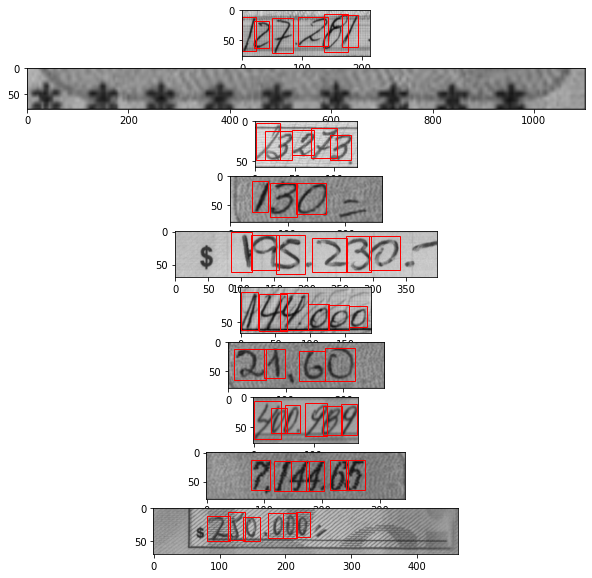

In [5]:
# visualizacion de algunas imagenes
fig, axs = plt.subplots(10, 1, figsize=(10,10))
for i, img_path in enumerate(images_path[:10]):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  viewImageWAnnotations(img_path, annot, axs[i])

In [6]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [7]:
annotations2write = []
classes2write = set([])

for i, img_path in enumerate(images_path):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  if len(annot) > 0:
    for a in annot:
      x1 = a[1]
      y1 = a[2]
      x2 = x1 + a[3]
      y2 = y1 + a[4]
      if x1 >= 0 and y1 >= 0:
        annotations2write.append([img_path, x1, y1, x2, y2, a[0]])
        classes2write.add('{}'.format(a[0]))

print(len(annotations2write))
print(len(classes2write))

with open(ANNOTATIONS_FILE, 'w') as f:
  writer = csv.writer(f)
  writer.writerows(annotations2write)

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(classes2write):
    f.write('{},{}\n'.format(i,i))

31487
10


In [8]:
!git clone https://github.com/MartinVIllesca/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 5876 (delta 4), reused 12 (delta 4), pack-reused 5862
Receiving objects: 100% (5876/5876), 13.52 MiB | 4.16 MiB/s, done.
Resolving deltas: 100% (3952/3952), done.


In [9]:
%cd keras-retinanet/

!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170566 sha256=7b10e48131232502c7ce4dd4bd32307fc4006f5f6987b9ae983b287de992d83d
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=88abfad1961e11d7ef903bd536bd7a73bc024ad04eded253120357f6231be821
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [10]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.o
In file included from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1832:0,
                 from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/arrayobject.h:4,
 

In [11]:
!pwd
%cd ..

/content/keras-retinanet
/content


In [ ]:
PRETRAINED_MODEL = './drive/My Drive/dataCC7221/tarea2/last/resnet18_csv_25.h5'
# PRETRAINED_MODEL = '/content/drive/My\ Drive/dataCC7221/tarea2/resnet18_csv_06_1.h5'

# URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet101_oid_v1.0.0.h5'
# URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
# urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./drive/My\ Drive/dataCC7221/tarea2/last/resnet18_csv_16.h5


In [ ]:
!keras-retinanet/keras_retinanet/bin/train.py --backbone resnet18 --lr 0.00001 --initial-epoch 16 --snapshot-path ./drive/My\ Drive/dataCC7221/tarea2/last/ --weights {PRETRAINED_MODEL} --multiprocessing --batch-size 8 --steps 500 --epochs 25 csv annotations.csv classes.csv

Using TensorFlow backend.
2020-07-18 21:27:54.922742: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Creating model, this may take a second...
Loading resnet18
2020-07-18 21:27:56.928862: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-18 21:27:56.967839: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-18 21:27:56.968466: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-07-18 21:27:56.968507: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcud

In [12]:
import matplotlib as mp
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm
import os
import random
import numpy as np
import matplotlib.pyplot as plt


In [13]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image


In [14]:

model = models.load_model('./drive/My Drive/dataCC7221/tarea2/last/resnet18_csv_37.h5', backbone_name='resnet18')
model = models.convert_model(model)

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

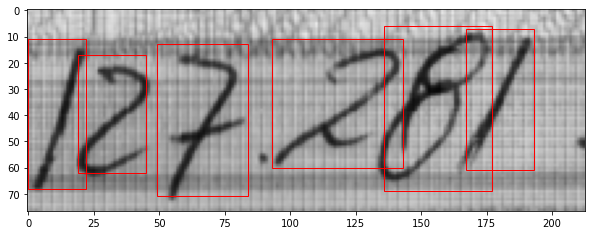

[[  0.72738916  10.947404    22.041512    68.57357   ]
 [ 18.369324    17.307734    47.92441     64.12362   ]
 [ 50.519005    12.79344     83.11538     71.204094  ]
 [ 91.0242       9.792178   142.53711     59.968884  ]
 [133.74991      4.982186   177.56485     65.88096   ]]
[0.7596435  0.80796134 0.78384227 0.7407616  0.68599266]
[1 2 7 2 8]


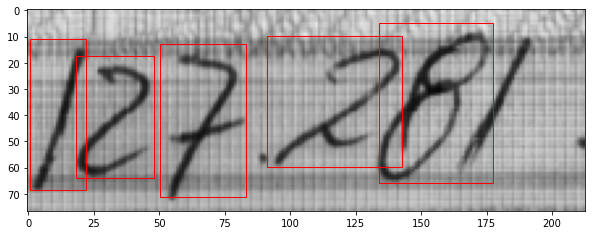

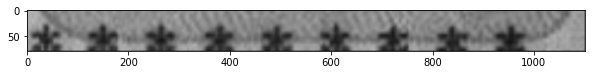

[]
[]
[]


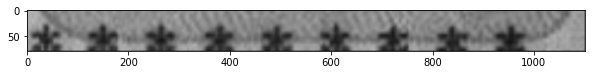

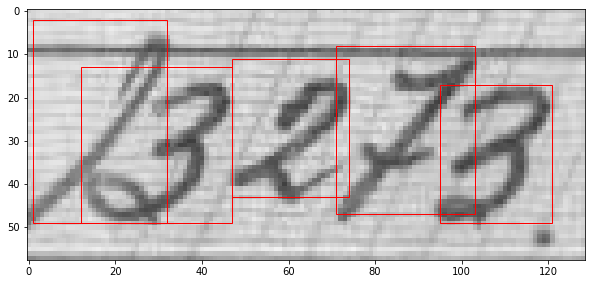

[[ 10.723555  10.593717  46.3421    48.915646]
 [ 46.349476  11.93828   73.82767   44.623665]
 [ 71.5487     7.529568 101.65182   48.287033]]
[0.6445547  0.71202195 0.7656532 ]
[3 2 7]


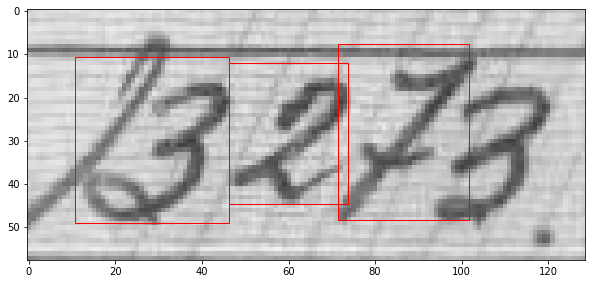

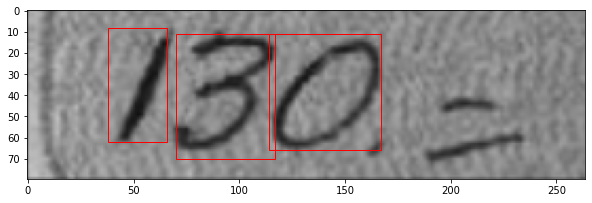

[[ 39.05166    8.593798  69.016594  62.29981 ]
 [ 67.71704   10.499814 116.2213    66.51307 ]
 [114.621216  11.884109 168.65953   67.349335]]
[0.8680256 0.7287195 0.9533378]
[1 3 0]


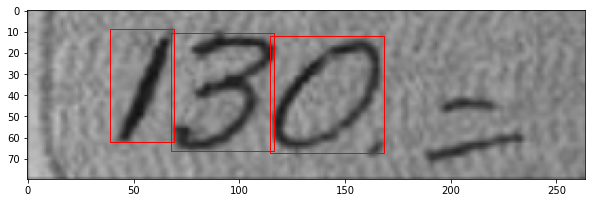

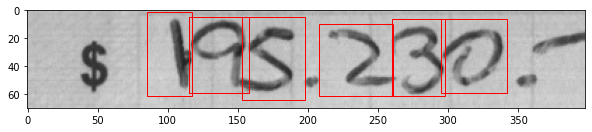

[[114.18758    5.0672   155.92761   54.55192 ]
 [147.98628    6.737901 193.84157   58.967243]
 [211.89369    8.834257 261.8056    56.431637]
 [261.53098    9.813746 296.38928   59.647537]
 [297.16388    9.787156 341.26968   57.320965]]
[0.7275245  0.6429294  0.68935627 0.6694236  0.9357148 ]
[9 3 2 3 0]


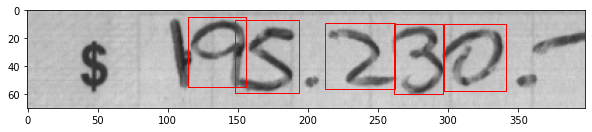

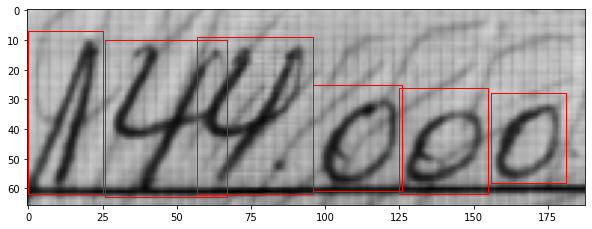

[[  0.3776207   6.962097   24.954668   61.24365  ]
 [ 29.319452    7.111497   68.18443    62.018353 ]
 [ 58.044926    8.745234   94.6853     60.925926 ]
 [ 96.4425     25.187744  125.762405   59.71208  ]
 [125.427345   25.386745  154.71071    60.564056 ]
 [155.62894    27.524221  180.43106    57.56257  ]]
[0.87911624 0.7429075  0.8114351  0.8430498  0.8731077  0.946146  ]
[1 4 4 0 0 0]


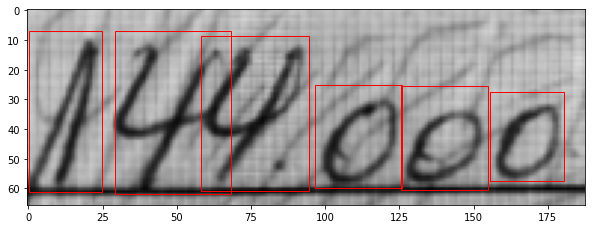

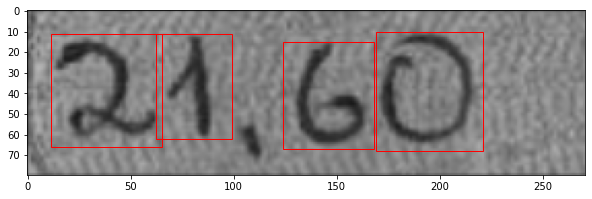

[[ 10.508672  13.049356  63.61842   62.229027]
 [ 66.223495  10.08166   94.36077   62.768463]
 [127.30084   13.934804 164.56528   65.857346]
 [169.70131    9.325694 219.03813   65.47302 ]]
[0.8007247  0.85405076 0.9413539  0.8806699 ]
[2 1 6 0]


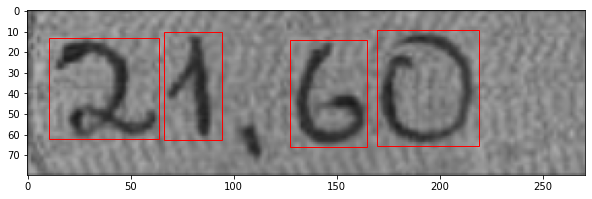

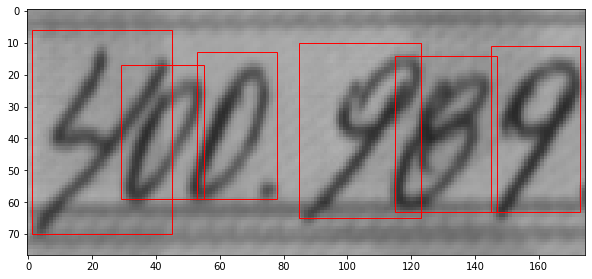

[[  1.8825737   8.098594   44.04335    68.99281  ]
 [ 30.010725   18.397974   54.75907    60.60124  ]
 [ 50.356358   13.846981   77.43116    60.03868  ]
 [111.97844    15.48729   144.86978    63.379795 ]
 [113.982376   16.911882  144.7357     65.11839  ]]
[0.6127166  0.787035   0.85919386 0.61009485 0.64660555]
[4 0 0 8 0]


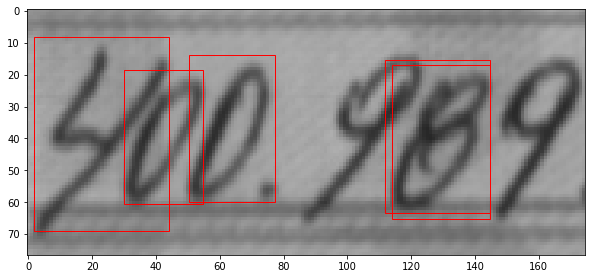

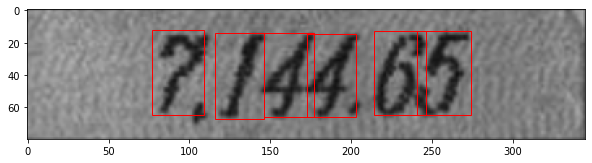

[[ 76.4643    13.053955 111.11556   64.77867 ]
 [117.25692   12.452067 146.24426   66.16639 ]
 [172.62772   12.981649 204.5556    64.73258 ]
 [212.89511   13.200316 244.79597   65.07825 ]
 [241.09056   11.606264 273.92593   65.43306 ]]
[0.75376064 0.8604506  0.6703313  0.7303323  0.72403604]
[7 1 4 6 5]


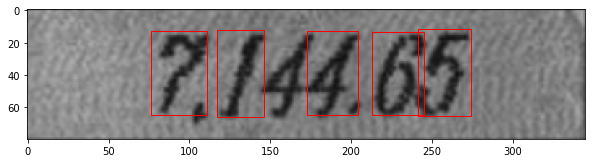

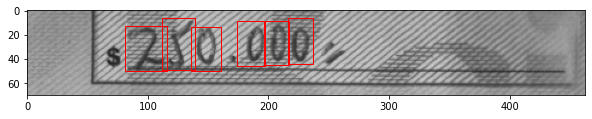

[[ 80.62851   10.134236 112.95684   51.265766]
 [136.8687     8.248008 160.4634    47.38759 ]
 [178.15996    9.201662 198.60976   44.58047 ]
 [198.25612    8.669003 216.86824   43.502537]
 [216.69783    8.952161 237.95546   43.6727  ]]
[0.8234218  0.90689135 0.8150287  0.7905814  0.7703962 ]
[2 0 0 0 0]


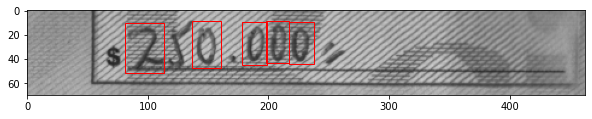

In [16]:
umbral = 0.6

for i, img_path in enumerate(images_path[:10]):
  img_path = os.path.join(training_images, img_path)
  annot = annotations[i]
  fig, axs = plt.subplots(1, 1, figsize=(10,10))
  image = viewImageWAnnotations(img_path, annot, axs)
  plt.show()

  try:
    if image.shape[2] != 3: break
  except Exception as e:
    print(e)
    continue

  image = read_image_bgr(img_path)
  image2 = cv2.imread(img_path)
  fig, axs = plt.subplots(1,1, figsize=(10,10))
  image = preprocess_image(image)
  axs.imshow(image2)
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict(np.expand_dims(image, axis=0))
  boxes /= scale
  boxes = boxes[0]
  scores = scores[0]
  labels = labels[0]

  orden = np.where(scores > umbral)[0]
  orden = [x for _,x in sorted(zip([x[0] for x in boxes[orden]], orden))]

  for box in boxes[orden]:
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor='r',facecolor='none')
    axs.add_patch(rect)

  print(boxes[orden])
  print(scores[orden])
  print(labels[orden])
  plt.show()
  # print(np.where(scores > umbral)[0])